In [1]:
import sys
#change these paths to where they are located on your computer
sys.path.append("/Users/anirudhnatarajan/Documents/UPenn/McNeuron")
import McNeuron
import pickle
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
tree_data = pickle.load(open('.././trees/tree_data.csv', 'rb'))

In [3]:
trees = tree_data.sort_values(['location'])
trees = trees.reset_index(drop=True)

In [4]:
def splitTrees(location) :
    """
    splitTrees is used to quickly and efficiently split the data into usable chunks

    Parameters:
    -----------
    location: string
        the name of the location where the tree is from, matches exactly with the trees dataset, and is a string

    Return:
    -------
    splitTrees returns 2 lists of equal size that contain proper training and testing data

    """
    
    ind = np.where(trees['location']==location)[0]
    
    train = [0] * size
    test = [0] * size
    rand = np.linspace(0,totalTrees-1,totalTrees)
    
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(trees['swc'][ind[int(rand[r])]])
        rand = np.delete(rand,r)
        neuron.setNormalizedFeatures()
        neuron.geometrical_features()
        neuron.motif_features()
        train[i] = neuron.getNeuronVector()
    
#     print('half')
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(trees['swc'][ind[int(rand[r])]])
        rand = np.delete(rand,r)
        neuron.setNormalizedFeatures()
        neuron.geometrical_features()
        neuron.motif_features()
        test[i] = neuron.getNeuronVector()
        
    return train,test

In [5]:
import pandas as pd
neurons = pd.read_pickle("/Users/anirudhnatarajan/Documents/UPenn/neuronData/neurons.csv")

In [6]:
help1 = np.where(neurons['Secondary Brain Region']=='CA1')[0]
help2 = np.where(neurons['Species Name']=='mouse')[0]
index_to_see = np.intersect1d(help1,help2)

indA = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='GABAergic')[0]
indP = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='pyramidal')[0]
indS = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='Somatostatin (SOM)-positive')[0]
indB = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='basket')[0]
indT = np.where(neurons.iloc[index_to_see]['Secondary Cell Class']=='perisomatic targeting')[0]


def getSWC(ind) :
    length = len(ind)
    swc = [0] * length
    for i in range(0,length) :
        swc[i] = neurons['swc'][index_to_see[ind]][index_to_see[ind][i]]
    return swc

swcA = getSWC(indA)
swcP = getSWC(indP)
swcS = getSWC(indS)
swcB = getSWC(indB)
swcT = getSWC(indT)

In [7]:
def getVectors(swc, size) :
    train = [0] * size
    test = [0] * size
    rand = np.linspace(0,len(swc)-1,len(swc))
    
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(swc[int(rand[r])])
        rand = np.delete(rand,r)
        neuron.l_measure_features()
        neuron.motif_features()
        neuron.geometrical_features()
        train[i] = neuron.getNeuronVector()

#     print('half')
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(swc[int(rand[r])])
        rand = np.delete(rand,r)
        neuron.l_measure_features()
        neuron.motif_features()
        neuron.geometrical_features()
        test[i] = neuron.getNeuronVector()
    
#     print('done')
    return train,test

In [8]:
totalTrees = 20
size = int(totalTrees/2)

trainG, testG = splitTrees('Gabon')
print('done')
trainH, testH = splitTrees('Ghana')
print('done')
trainU, testU = splitTrees('UK')
print('done')
trainW, testW = splitTrees('Wytham Meteoc (UK)')
print('done')

trainA,testA = getVectors(swcA, size)
print('done')
trainP,testP = getVectors(swcP, size)
print('done')
trainS,testS = getVectors(swcS, size)
print('done')
trainB,testB = getVectors(swcB, size)
print('done')
trainT,testT = getVectors(swcT, size)
print('done')

done
done
done
done
done
done
done
done
done


In [8]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model

In [9]:
def subsetData(arr,q):
    """
    subsetData is used to split the data into lists with only 1 classifying feature in order to test how important each feature is individually for classification

    Parameters:
    -----------
    arr: array or list
        the master array that contains all the features
    q: int
        the index of the desired feature

    Return:
    -------
    subsetData returns an array with only 1 classifying feature

    """
    
    x = [0] * len(arr)
    for i in range(0,len(arr)) :
        x[i] = arr[i][q]
    return x

In [11]:
for q in range(0,31) :
    a = subsetData(trainA,q)
    b = subsetData(trainP,q)
    c = subsetData(trainS,q)
    d = subsetData(trainB,q)
    e = subsetData(trainT,q)
    f = subsetData(trainG,q)
    g = subsetData(trainH,q)
    h = subsetData(trainU,q)
    i = subsetData(trainW,q)
    j = subsetData(testA,q)
    k = subsetData(testP,q)
    l = subsetData(testS,q)
    m = subsetData(testB,q)
    n = subsetData(testT,q)
    o = subsetData(testG,q)
    p = subsetData(testH,q)
    r = subsetData(testU,q)
    s = subsetData(testW,q)

    train = np.expand_dims(np.concatenate((a,b,c,d,e,f,g,h,i)),axis=1)
    test = np.expand_dims(np.concatenate((j,k,l,m,n,o,p,r,s)),axis=1)

    y = np.concatenate(([0] * size*5,[1] * size*4))
    clf = ExtraTreesClassifier()
    clf.fit(train,y)
    z = clf.predict(test)

    sum = 0
    parts = 2
    length = 0
    for i in range (0,parts) :
        for j in range (0,len(np.where(y==i)[0])) :
            if z[j + length] == i :
                sum += 1
        length += len(np.where(y==i)[0])
    accuracy = sum / len(z)
    print(accuracy, q)

1.0 0
1.0 1
1.0 2
0.8888888888888888 3
0.8888888888888888 4
0.9777777777777777 5
0.9333333333333333 6
0.8333333333333334 7
1.0 8
0.9555555555555556 9
0.9888888888888889 10
1.0 11
1.0 12
1.0 13
0.8222222222222222 14
0.8444444444444444 15
0.7777777777777778 16
0.8111111111111111 17
0.8111111111111111 18
0.8222222222222222 19
0.8555555555555555 20
0.7888888888888889 21
0.8666666666666667 22
0.8777777777777778 23
0.6 24
0.6777777777777778 25
0.6888888888888889 26
0.7222222222222222 27
0.7333333333333333 28
0.9333333333333333 29
0.9555555555555556 30


In [10]:
def getFeatureImportance(length, featureNum) :
    """
    getFeatureImportance uses the subsetData function to generate a matrix with a large number of individual feature accuracies.

    Parameters:
    -----------
    length: int
        how many times the function will get new data and test the accuracy of individual features 
    featureNum: int
        the number of features needed to be tested

    Return:
    -------
    getFeatureImportance returns a matrix of shape (featureNum,length) with all values filled with the accuracy of each feature

    """
    
    masterFeature = np.zeros([featureNum, length])
    for t in range (0,length) :
        
        trainG, testG = splitTrees('Gabon')
        trainH, testH = splitTrees('Ghana')
        trainU, testU = splitTrees('UK')
        trainW, testW = splitTrees('Wytham Meteoc (UK)')
        print('done')

        trainA,testA = getVectors(swcA, size)
        trainP,testP = getVectors(swcP, size)
        trainS,testS = getVectors(swcS, size)
        trainB,testB = getVectors(swcB, size)
        trainT,testT = getVectors(swcT, size)
        print('done')
        
        for q in range(0,featureNum) :
            a = subsetData(trainA,q)
            b = subsetData(trainP,q)
            c = subsetData(trainS,q)
            d = subsetData(trainB,q)
            e = subsetData(trainT,q)
            f = subsetData(trainG,q)
            g = subsetData(trainH,q)
            h = subsetData(trainU,q)
            i = subsetData(trainW,q)
            j = subsetData(testA,q)
            k = subsetData(testP,q)
            l = subsetData(testS,q)
            m = subsetData(testB,q)
            n = subsetData(testT,q)
            o = subsetData(testG,q)
            p = subsetData(testH,q)
            r = subsetData(testU,q)
            s = subsetData(testW,q)

            train = np.expand_dims(np.concatenate((a,b,c,d,e,f,g,h,i)),axis=1)
            test = np.expand_dims(np.concatenate((j,k,l,m,n,o,p,r,s)),axis=1)

            y = np.concatenate(([0] * size*5,[1] * size*4))
            clf = ExtraTreesClassifier()
            clf.fit(train,y)
            z = clf.predict(test)

            sum = 0
            parts = 2
            length = 0
            for i in range (0,parts) :
                for j in range (0,len(np.where(y==i)[0])) :
                    if z[j + length] == i :
                        sum += 1
                length += len(np.where(y==i)[0])
            accuracy = sum / len(z)
            masterFeature[q][t] = accuracy
        print(t)
    return masterFeature

In [14]:
totalTrees = 20
size = int(totalTrees/2)

featureNames = ['Width X', 'Height Y', 'Soma Radii', 'Soma Surface Area', \
                'Soma Volume', 'Skewness X', 'Skewness Y', 'Skewness Z', \
                'Euclidian Skewness', 'Length', 'Surface Area', \
                'Section Area', 'Volume', 'Average Radius', 'Tips', \
                'Stems', 'Branch Pt', 'Segments', 'branch branch', \
                'branch die', 'die die', 'global angle', 'local angle', \
                'distance from root', 'path_length/euclidean', \
                'mean Contraction', 'branch angle', 'side branch angle', \
                'mean segmental neural length', 'mean segmental euclidean length', \
                'segmental branch angle']
featureNum = len(featureNames)

masterFeature = getFeatureImportance(3, featureNum)

done
done
0
done
done
1
done
done
2


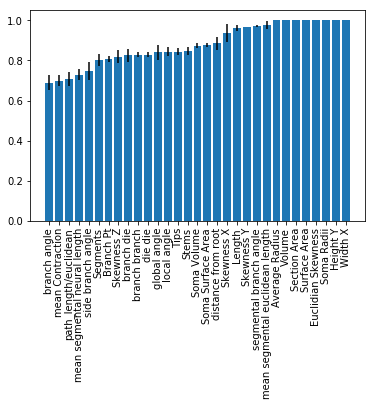

In [19]:
"""
This cell uses the getFeatureImportance funtion to get a large amount of data and graph the
results on a bar graph
"""

values = np.zeros([3,featureNum])
for i in range(0,featureNum) :
    values[0,i] = masterFeature[i,:].mean()
    values[1,i] = masterFeature[i,:].std()
featureNames = np.vstack(featureNames)
index = np.argsort(values[0,:])
values[2] = index
featureRange = np.linspace(0,featureNum-1,featureNum)
plt.bar(featureRange,values[0,index], yerr = values[1,index])
plt.xticks(featureRange,featureNames[index,0], rotation='vertical')
plt.subplots_adjust(bottom=0.15)

plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceTreeVsNeuron.eps', dpi=300, bbox_inches = 'tight')
plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceTreeVsNeuron.png', dpi=300, bbox_inches = 'tight')

In [12]:
"""
Try out any of the following classifiers by uncommenting a line!
"""

#clf = svm.SVC()
#clf = RandomForestClassifier()
clf = ExtraTreesClassifier()
#clf = DecisionTreeClassifier()
#clf = GradientBoostingClassifier()
#clf = BaggingClassifier()
#clf = BaggingClassifier(ExtraTreesClassifier())
#clf = neighbors.KNeighborsClassifier()
#clf = SGDClassifier()
#clf = MLPClassifier()
#clf = GaussianNB()
#clf = linear_model.LinearRegression()

In [14]:
"""
Train the classifier and print the accuracy
"""

train = np.concatenate((trainA,trainP,trainS,trainB,trainT,trainG,trainH,trainU,trainW))
test = np.concatenate((testA,testP,testS,testB,testT,testG,testH,testU,testW))

accuracy = 0
y = np.concatenate(([0] * size*5,[1] * size*4))
clf.fit(train,y)
z = clf.predict(test)

sum = 0
parts = 2
length = 0
for i in range (0,parts) :
    for j in range (0,len(np.where(y==i)[0])) :
        if z[j + length] == i :
            sum += 1
    length += len(np.where(y==i)[0])
accuracy = sum / len(z)
print(accuracy, sum)

1.0 90


50
40


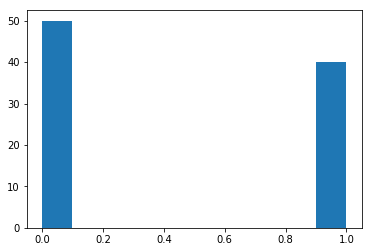

In [15]:
"""
This histogram gives you the breakdown of what the classifier predicted on the test values
"""

plt.hist(z)
print(len(np.where(z == 0)[0]))
print(len(np.where(z == 1)[0]))

[t-SNE] Computing 89 nearest neighbors...
[t-SNE] Indexed 90 samples in 0.001s...
[t-SNE] Computed neighbors for 90 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 90 / 90
[t-SNE] Mean sigma: 2867.520009
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 52.8120499, gradient norm = 0.4694596 (50 iterations in 0.093s)
[t-SNE] Iteration 100: error = 53.1758919, gradient norm = 0.4552033 (50 iterations in 0.077s)
[t-SNE] Iteration 150: error = 52.1666565, gradient norm = 0.5951982 (50 iterations in 0.079s)
[t-SNE] Iteration 200: error = 50.3052711, gradient norm = 0.6011702 (50 iterations in 0.076s)
[t-SNE] Iteration 250: error = 50.1212692, gradient norm = 0.5911282 (50 iterations in 0.074s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.121269
[t-SNE] Iteration 300: error = 0.6909859, gradient norm = 0.0066492 (50 iterations in 0.075s)
[t-SNE] Iteration 350: error = 0.3649688, gradient norm = 0.0054645 (5

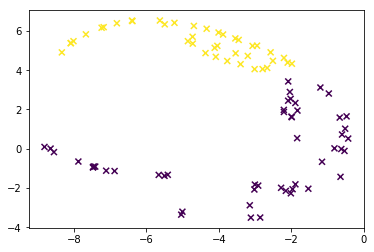

In [16]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, verbose=2).fit_transform(train)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, marker='x')
#plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Misc/treeNeuronClassificationTSNE.eps')

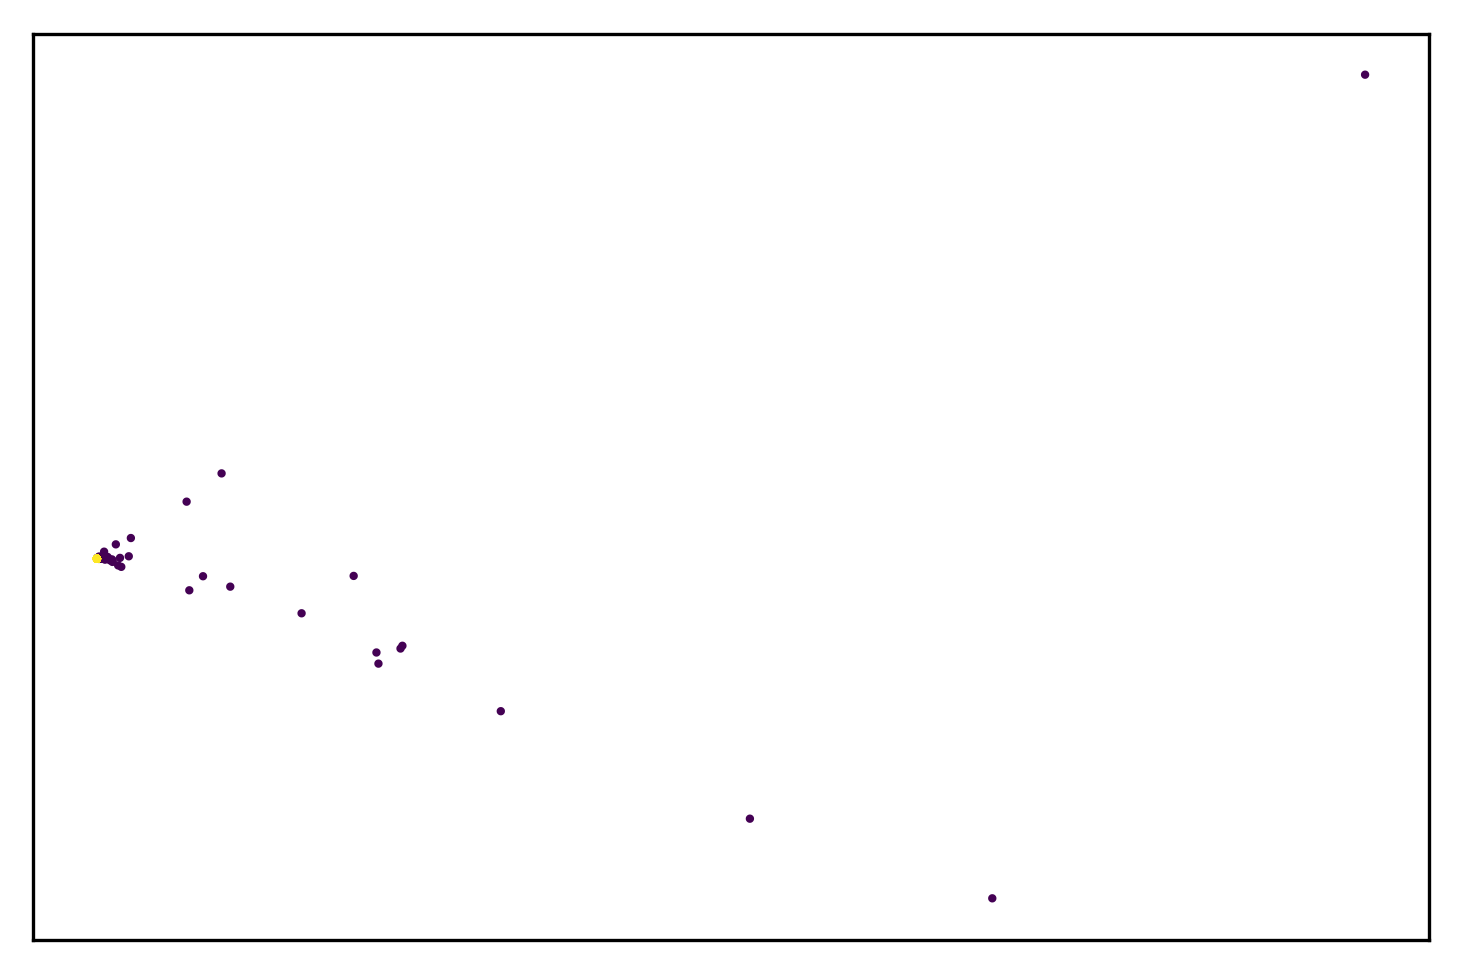

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train,y)
X_embedded = pca.fit_transform(train,y)

fig,ax = plt.subplots(1)
ax.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=1)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])
fig.dpi=300

# fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/treeNeuronClassificationPCA.eps')
# fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/treeNeuronClassificationPCA.png')